<a href="https://colab.research.google.com/github/raagKush/ML_learning_google_collab/blob/main/bank_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
from  tensorflow import keras
import numpy as np

In [2]:
df = pd.read_csv("/content/Bank Churn Modelling.csv")

In [3]:
df.sample(3)


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
8458,15728542,Vorobyova,850,France,Female,71,4,0.00,2,1,1,107236.87,0
5567,15787222,Ch'in,676,Germany,Male,28,1,69459.05,2,1,1,128461.29,0
4524,15658852,Stevens,676,France,Male,38,8,0.00,2,1,1,133692.88,0


In [4]:
df1= df.drop((['CustomerId','Surname']),axis=1)
df1.sample(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
7363,603,France,Male,40,4,102833.46,2,1,1,38829.11,0
2926,510,France,Male,63,8,0.00,2,1,1,115291.86,0
4397,659,Germany,Male,39,8,52106.33,2,1,1,107964.36,0


In [5]:
df1.Gender.replace({'Male':1,'Female':0},inplace=True)


In [6]:
df1.corr(method='pearson',numeric_only=True)

,CreditScore,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CreditScore,1.000000,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Gender,-0.002857,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
Num Of Products,0.012238,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
Has Credit Card,-0.005458,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
Is Active Member,0.025651,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
Estimated Salary,-0.001384,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Churn,-0.027094,-0.106512,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [7]:
df1.info() #to find if any null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CreditScore       10000 non-null  int64  
 1   Geography         10000 non-null  object 
 2   Gender            10000 non-null  int64  
 3   Age               10000 non-null  int64  
 4   Tenure            10000 non-null  int64  
 5   Balance           10000 non-null  float64
 6   Num Of Products   10000 non-null  int64  
 7   Has Credit Card   10000 non-null  int64  
 8   Is Active Member  10000 non-null  int64  
 9   Estimated Salary  10000 non-null  float64
 10  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 859.5+ KB


In [31]:
for column in df1:
    print(f'{column}:{df1[column].unique()}')

CreditScore:[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 56

In [33]:
df2 = pd.get_dummies(df1,columns =['Geography','Num Of Products'],dtype=int) #one hot encoding

In [34]:
df2.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,Has Credit Card,Is Active Member,Estimated Salary,Churn,Geography_France,Geography_Germany,Geography_Spain,Num Of Products_1,Num Of Products_2,Num Of Products_3,Num Of Products_4
6439,632,1,37,1,138207.08,1,0,60778.11,1,0,0,1,1,0,0,0
7349,632,1,42,6,59972.26,0,1,148172.94,0,0,1,0,0,1,0,0
8396,607,0,48,4,112070.86,1,0,173568.30,1,1,0,0,0,0,1,0


Text(0.5, 0, 'Balance')

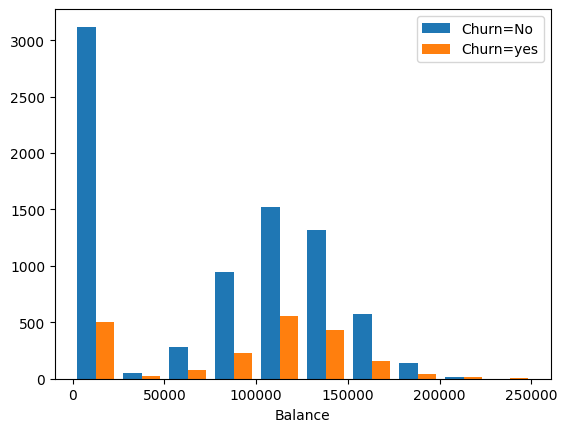

In [30]:
from matplotlib import pyplot as plt
Balance_churn_no = df2[df.Churn ==0].Balance
Balance_churn_yes = df2[df.Churn ==1].Balance
plt.hist([Balance_churn_no , Balance_churn_yes],label = ['Churn=No','Churn=yes'])
plt.legend()
plt.xlabel("Balance")


In [37]:
'''Scale data for non boolean columns'''
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']
scaler = MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [39]:
df2.sample(4)

,CreditScore,Gender,Age,Tenure,Balance,Has Credit Card,Is Active Member,Estimated Salary,Churn,Geography_France,Geography_Germany,Geography_Spain,Num Of Products_1,Num Of Products_2,Num Of Products_3,Num Of Products_4
1327,0.706,1,0.027027,0.3,0.658678,1,1,0.208096,0,0,0,1,1,0,0,0
742,0.570,1,0.148649,0.7,0.420115,1,1,0.749283,0,1,0,0,1,0,0,0
5762,0.766,1,0.283784,0.5,0.364843,1,1,0.468902,0,0,1,0,1,0,0,0
7474,0.708,1,0.432432,0.4,0.659384,1,0,0.603854,1,1,0,0,1,0,0,0
